In [1]:
import pandas as pd
import duckdb 



C:\Users\HOME\AppData\Local\Temp\ipykernel_9292\115219571.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
duckdb.sql('CREATE TABLE flights AS SELECT * FROM "flights.csv"')

In [3]:
duckdb.sql('CREATE TABLE airports AS SELECT * from "airports.csv"')

In [4]:
duckdb.sql('CREATE TABLE airlines AS select * from "airlines.csv"')

In [5]:
duckdb.sql('show tables')

┌──────────┐
│   name   │
│ varchar  │
├──────────┤
│ airlines │
│ airports │
│ flights  │
└──────────┘

In [6]:
duckdb.sql("""ALTER TABLE airlines
RENAME COLUMN column0 TO Carrier""")
duckdb.sql("""ALTER TABLE airlines
RENAME COLUMN column1 TO CarrierName""")

In [7]:
duckdb.sql("""create table flight_delay as
           select a1.city DEPARTURE, a2.city ARRIVAL, f.Carrier, al.CarrierName, f.DepDelay, f.ArrDelay From flights f
           JOIN airports a1
           on f.OriginAirportID = a1.airport_ID    
           JOIN airports a2
           ON f.DestAirportID  = a2.airport_id     
           JOIN airlines al
           ON f.Carrier = al.Carrier
""")


In [23]:
duckdb.sql(""" select * from flight_delay limit 10
""")

┌───────────┬───────────┬─────────┬──────────────────────────┬──────────┬──────────┐
│ DEPARTURE │  ARRIVAL  │ Carrier │       CarrierName        │ DepDelay │ ArrDelay │
│  varchar  │  varchar  │ varchar │         varchar          │  int64   │  int64   │
├───────────┼───────────┼─────────┼──────────────────────────┼──────────┼──────────┤
│ Milwaukee │ Newark    │ EV      │ ExpressJet Airlines Inc. │      134 │      143 │
│ Milwaukee │ Newark    │ EV      │ ExpressJet Airlines Inc. │      -10 │       11 │
│ Milwaukee │ Newark    │ EV      │ ExpressJet Airlines Inc. │      -11 │      -21 │
│ Milwaukee │ Newark    │ EV      │ ExpressJet Airlines Inc. │       -4 │      -18 │
│ Milwaukee │ Newark    │ EV      │ ExpressJet Airlines Inc. │      -10 │      -31 │
│ Milwaukee │ Newark    │ EV      │ ExpressJet Airlines Inc. │       -1 │      -10 │
│ Milwaukee │ Newark    │ EV      │ ExpressJet Airlines Inc. │       -2 │      -10 │
│ Milwaukee │ Houston   │ EV      │ ExpressJet Airlines Inc. │   

In [9]:
si = duckdb.sql(""" select * from flight_delay
""")
resu = si.fetchall()

dataframe = pd.DataFrame(resu, columns =[col[0] for col in si.description])
dataframe.to_csv('flight_delay.csv', index=False)

In [11]:
os = pd.read_csv('flight_delay.csv')
os.head(15)

,DEPARTURE,ARRIVAL,Carrier,CarrierName,DepDelay,ArrDelay
0,Milwaukee,Newark,EV,ExpressJet Airlines Inc.,134,143
1,Milwaukee,Newark,EV,ExpressJet Airlines Inc.,-10,11
2,Milwaukee,Newark,EV,ExpressJet Airlines Inc.,-11,-21
3,Milwaukee,Newark,EV,ExpressJet Airlines Inc.,-4,-18
4,Milwaukee,Newark,EV,ExpressJet Airlines Inc.,-10,-31
5,Milwaukee,Newark,EV,ExpressJet Airlines Inc.,-1,-10
6,Milwaukee,Newark,EV,ExpressJet Airlines Inc.,-2,-10
7,Milwaukee,Houston,EV,ExpressJet Airlines Inc.,1,-14
8,Omaha,Houston,EV,ExpressJet Airlines Inc.,57,60
9,Chicago,Cleveland,EV,ExpressJet Airlines Inc.,-1,5


In [18]:
citys =['Milwaukee', 'Cleveland']
os.query('Carrier=="EV" & DepDelay>0 & DEPARTURE==@citys' ).head(15)

,DEPARTURE,ARRIVAL,Carrier,CarrierName,DepDelay,ArrDelay
0,Milwaukee,Newark,EV,ExpressJet Airlines Inc.,134,143
7,Milwaukee,Houston,EV,ExpressJet Airlines Inc.,1,-14
23,Cleveland,Louisville,EV,ExpressJet Airlines Inc.,23,11
31,Cleveland,Louisville,EV,ExpressJet Airlines Inc.,37,27
33,Cleveland,Louisville,EV,ExpressJet Airlines Inc.,15,11
36,Cleveland,Louisville,EV,ExpressJet Airlines Inc.,59,44
1323,Milwaukee,Houston,EV,ExpressJet Airlines Inc.,1,-9
1324,Milwaukee,Houston,EV,ExpressJet Airlines Inc.,1,-2
1516,Cleveland,Indianapolis,EV,ExpressJet Airlines Inc.,1,-10
1518,Cleveland,Indianapolis,EV,ExpressJet Airlines Inc.,3,-10


In [30]:
duckdb.sql(""" select * from flight_delay 
           where DEPARTURE in ('Cleveland' , 'Milwaukee') and Carrier ='EV' and DepDelay > 0
           """)

┌───────────┬───────────────────┬─────────┬──────────────────────────┬──────────┬──────────┐
│ DEPARTURE │      ARRIVAL      │ Carrier │       CarrierName        │ DepDelay │ ArrDelay │
│  varchar  │      varchar      │ varchar │         varchar          │  int64   │  int64   │
├───────────┼───────────────────┼─────────┼──────────────────────────┼──────────┼──────────┤
│ Cleveland │ Louisville        │ EV      │ ExpressJet Airlines Inc. │       23 │       11 │
│ Cleveland │ Louisville        │ EV      │ ExpressJet Airlines Inc. │       37 │       27 │
│ Cleveland │ Louisville        │ EV      │ ExpressJet Airlines Inc. │       15 │       11 │
│ Cleveland │ Louisville        │ EV      │ ExpressJet Airlines Inc. │       59 │       44 │
│ Cleveland │ Indianapolis      │ EV      │ ExpressJet Airlines Inc. │        1 │      -10 │
│ Cleveland │ Indianapolis      │ EV      │ ExpressJet Airlines Inc. │        3 │      -10 │
│ Milwaukee │ Newark            │ EV      │ ExpressJet Airlines Inc. │

In [33]:
os.nlargest(10,'DepDelay')

,DEPARTURE,ARRIVAL,Carrier,CarrierName,DepDelay,ArrDelay
2690235,Phoenix,Chicago,AA,American Airlines Inc.,1863,1835
1026543,Las Vegas,Honolulu,HA,Hawaiian Airlines Inc.,1847,1845
554022,Salt Lake City,Dallas/Fort Worth,AA,American Airlines Inc.,1620,1609
2680596,Philadelphia,Miami,AA,American Airlines Inc.,1487,1475
2690242,Phoenix,Chicago,AA,American Airlines Inc.,1481,1470
1296660,Tampa,Chicago,AA,American Airlines Inc.,1478,1466
53281,Minneapolis,Miami,AA,American Airlines Inc.,1446,1436
2012234,Atlanta,Miami,AA,American Airlines Inc.,1425,1429
568103,Seattle,Miami,AA,American Airlines Inc.,1417,1421
2686506,Albuquerque,Dallas/Fort Worth,AA,American Airlines Inc.,1409,1391


In [34]:
os.nsmallest(10,'DepDelay')

,DEPARTURE,ARRIVAL,Carrier,CarrierName,DepDelay,ArrDelay
2634105,Baltimore,Philadelphia,F9,Frontier Airlines Inc.,-63,-23
603059,Raleigh/Durham,New York,MQ,Envoy Air,-60,-69
3849,Denver,Nashville,EV,ExpressJet Airlines Inc.,-52,-10
1966263,Fort Myers,Pittsburgh,FL,AirTran Airways Corporation,-49,-53
489411,Los Angeles,Phoenix,OO,SkyWest Airlines Inc.,-45,-10
150233,Milwaukee,Houston,EV,ExpressJet Airlines Inc.,-42,-19
811818,Baltimore,Philadelphia,F9,Frontier Airlines Inc.,-41,-24
1004628,Buffalo,Newark,EV,ExpressJet Airlines Inc.,-40,-16
808527,Baltimore,Philadelphia,F9,Frontier Airlines Inc.,-38,-24
1005407,San Antonio,Memphis,EV,ExpressJet Airlines Inc.,-37,-5


In [50]:
os.query('ArrDelay>0 & DepDelay>0').groupby(by='CarrierName').mean('DepDelay')

,DepDelay,ArrDelay
CarrierName,,
AirTran Airways Corporation,36.197050,36.614162
Alaska Airlines Inc.,28.480097,31.223830
American Airlines Inc.,44.589021,44.019824
Delta Air Lines Inc.,43.392236,43.464711
Endeavor Air Inc.,54.051958,53.261713
Envoy Air,51.023140,53.315772
ExpressJet Airlines Inc.,55.313947,54.687602
Frontier Airlines Inc.,35.674568,38.205503
Hawaiian Airlines Inc.,26.740719,28.532522


In [51]:
os.query('ArrDelay>0 & DepDelay>0').describe().T


,count,mean,std,min,25%,50%,75%,max
DepDelay,814886.0,40.471942,54.245713,1.0,10.0,22.0,50.0,1863.0
ArrDelay,814886.0,40.206293,54.854750,1.0,9.0,21.0,50.0,1845.0


In [44]:
a = duckdb.sql("""SELECT CarrierName, AVG(ArrDelay) AS average_arrival_delay
                FROM flight_delay 
                WHERE ArrDelay  > 0
                GROUP BY CarrierName
                ORDER BY average_arrival_delay DESC""")
results= a.fetchall()
df = pd.DataFrame(results, columns=[col[0] for col in a.description])

print(df)

                    CarrierName  average_arrival_delay
0                     Envoy Air              13.731133
1        Frontier Airlines Inc.              12.848704
2      ExpressJet Airlines Inc.              10.205866
3                Virgin America               9.657906
4               JetBlue Airways               9.634792
5            Mesa Airlines Inc.               8.547585
6        Southwest Airlines Co.               8.313307
7   AirTran Airways Corporation               7.228765
8        American Airlines Inc.               7.136775
9         SkyWest Airlines Inc.               6.339958
10        United Air Lines Inc.               5.163631
11            Endeavor Air Inc.               4.789207
12              US Airways Inc.               3.924032
13         Delta Air Lines Inc.               2.803331
14       Hawaiian Airlines Inc.               1.532125
15         Alaska Airlines Inc.              -0.272103


In [48]:
print(a.description)

[('CarrierName', 'STRING', None, None, None, None, None), ('average_arrival_delay', 'NUMBER', None, None, None, None, None)]


C:\Users\HOME\AppData\Local\Temp\ipykernel_7636\538521634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CarrierName', y='average_arrival_delay', data=df, palette='viridis')


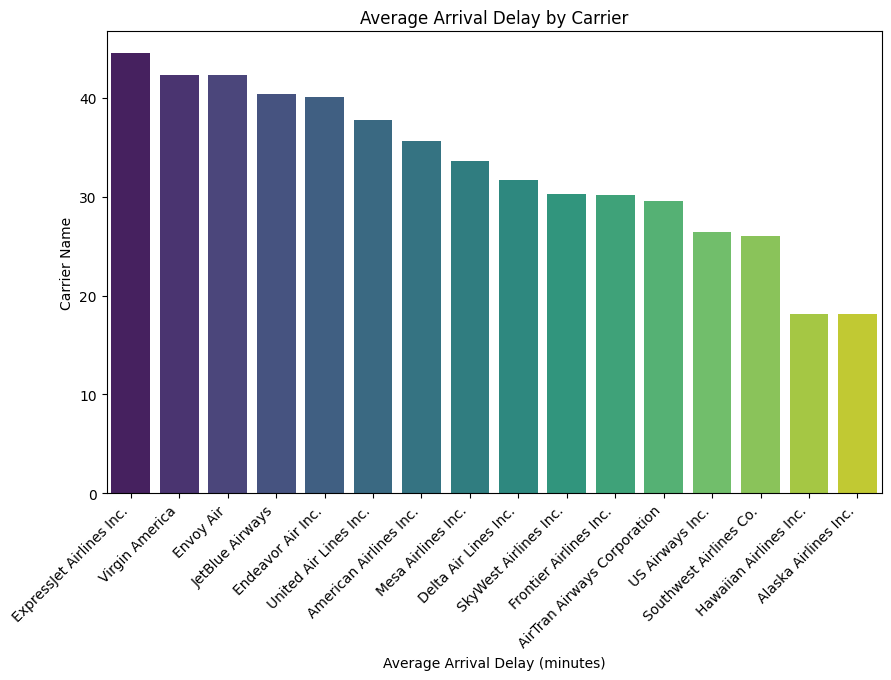

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='CarrierName', y='average_arrival_delay', data=df, palette='viridis')
plt.xticks(rotation=45, ha ='right')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Carrier Name')
plt.title('Average Arrival Delay by Carrier')
plt.show()


Text(0.5, 1.0, 'Scatter Plot')

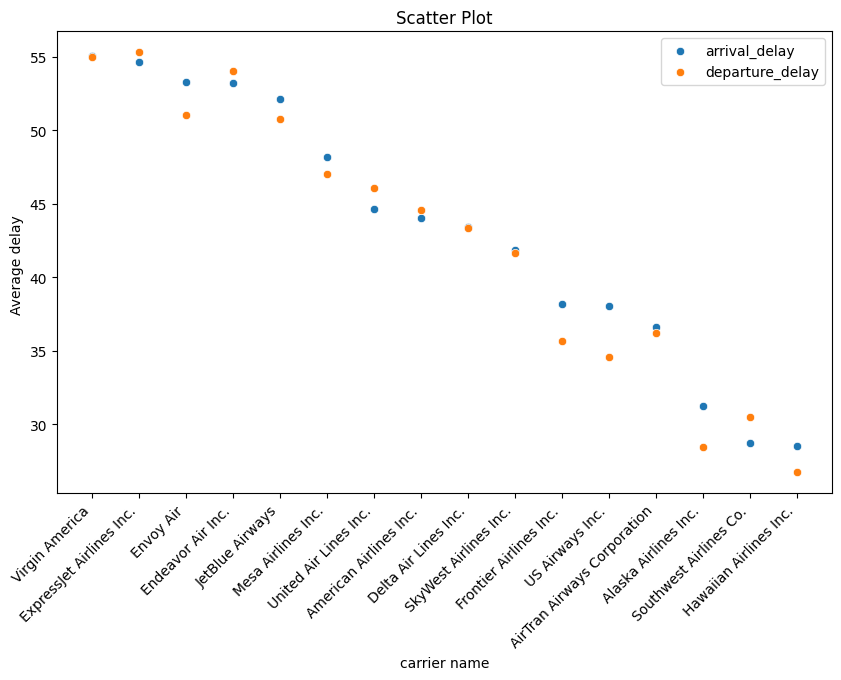

In [ ]:
c = duckdb.sql("""SELECT CarrierName, AVG(ArrDelay) AS average_arrival_delay, AVG(DepDelay) AS average_dep_delay
                FROM flight_delay 
                WHERE ArrDelay  > 0 and DepDelay > 0
                GROUP BY CarrierName
                ORDER BY average_arrival_delay DESC""")

resultss= c.fetchall()

df1 = pd.DataFrame(resultss, columns=[col[0] for col in c.description])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='CarrierName', y='average_arrival_delay', data=df1, label= "arrival_delay" )
sns.scatterplot(x='CarrierName', y='average_dep_delay', data=df1, label= "departure_delay")
plt.xticks(rotation=45, ha ='right')
plt.xlabel('carrier name')
plt.ylabel('Average delay ')
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Scatter Plot')

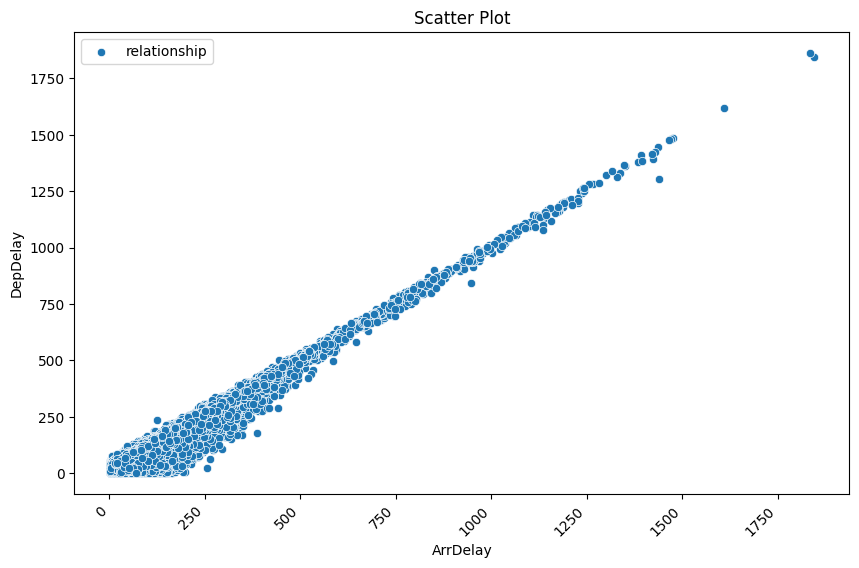

In [ ]:
c = duckdb.sql("""SELECT CarrierName, ArrDelay, DepDelay 
                FROM flight_delay 
                WHERE ArrDelay  > 0 and DepDelay > 0
                GROUP BY CarrierName, ArrDelay, DepDelay
                """)

resultsss= c.fetchall()

df2 = pd.DataFrame(resultsss, columns=[col[0] for col in c.description])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ArrDelay', y='DepDelay', data=df2, label= "relationship" )
plt.xticks(rotation=45, ha ='right')
plt.xlabel('ArrDelay')
plt.ylabel('DepDelay')
plt.title('Scatter Plot')

In [ ]:
duckdb.sql("""
            select CarrierName , 
           PERCENTILE_DISC(0.25) WITHIN GROUP (ORDER BY ArrDelay)  AS percentile_25,
            PERCENTILE_DISC(0.5) WITHIN GROUP (ORDER BY ArrDelay)  AS percentile_50,
            PERCENTILE_DISC(0.75) WITHIN GROUP (ORDER BY ArrDelay) AS percentile_75 
            from flight_delay
           where ArrDelay > 0
            group by CarrierName 
           """)

┌─────────────────────────────┬───────────────┬───────────────┬───────────────┐
│         CarrierName         │ percentile_25 │ percentile_50 │ percentile_75 │
│           varchar           │     int64     │     int64     │     int64     │
├─────────────────────────────┼───────────────┼───────────────┼───────────────┤
│ Envoy Air                   │             8 │            21 │            54 │
│ ExpressJet Airlines Inc.    │             8 │            23 │            60 │
│ Virgin America              │             6 │            17 │            54 │
│ Frontier Airlines Inc.      │             6 │            14 │            34 │
│ Endeavor Air Inc.           │             7 │            19 │            52 │
│ Hawaiian Airlines Inc.      │             3 │             7 │            15 │
│ US Airways Inc.             │             5 │            13 │            30 │
│ JetBlue Airways             │             8 │            20 │            53 │
│ American Airlines Inc.      │         

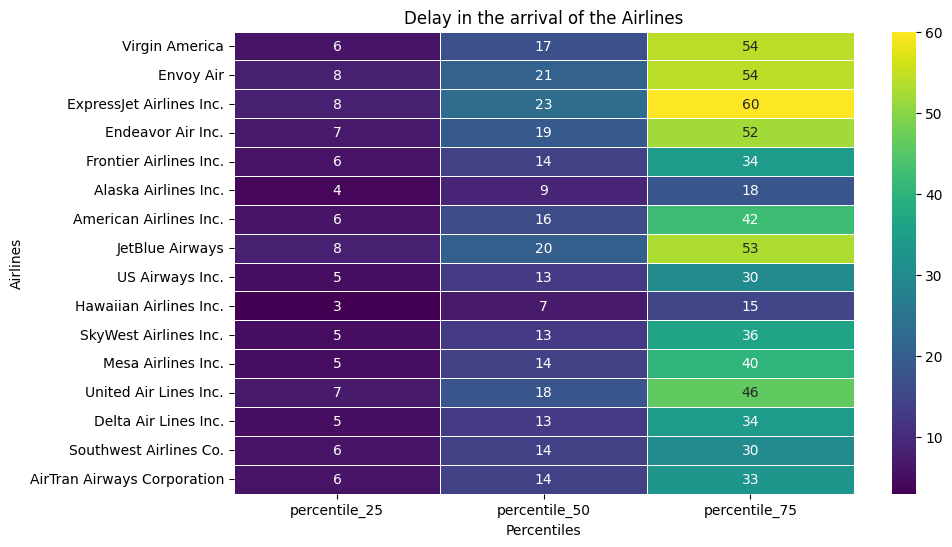

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

d = duckdb.sql("""
            select CarrierName , 
           PERCENTILE_DISC(0.25) WITHIN GROUP (ORDER BY ArrDelay)  AS percentile_25,
            PERCENTILE_DISC(0.5) WITHIN GROUP (ORDER BY ArrDelay)  AS percentile_50,
            PERCENTILE_DISC(0.75) WITHIN GROUP (ORDER BY ArrDelay) AS percentile_75 
            from flight_delay
           where ArrDelay > 0
            group by CarrierName 
           """)
r =d.fetchall()
df3 = pd.DataFrame(r, columns=[col[0] for col in d.description])

plt.figure(figsize=(10, 6))
sns.heatmap(df3.set_index('CarrierName'), cmap='viridis', annot=True, fmt="d", linewidths=.5)
plt.title('Delay in the arrival of the Airlines')
plt.xlabel('Percentiles')
plt.ylabel('Airlines')
plt.show()


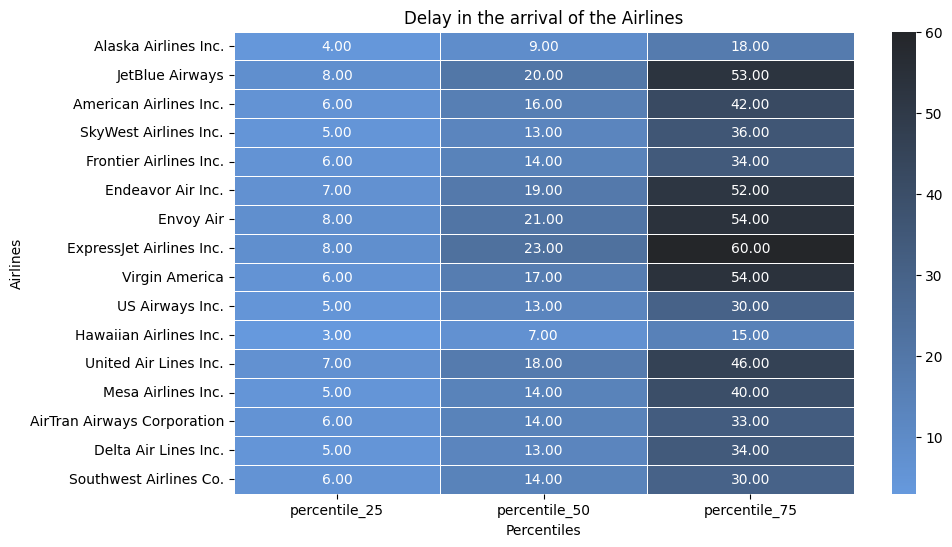

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

d = duckdb.sql("""
            select CarrierName , 
           PERCENTILE_DISC(0.25) WITHIN GROUP (ORDER BY ArrDelay)  AS percentile_25,
            PERCENTILE_DISC(0.5) WITHIN GROUP (ORDER BY ArrDelay)  AS percentile_50,
            PERCENTILE_DISC(0.75) WITHIN GROUP (ORDER BY ArrDelay) AS percentile_75 
            from flight_delay
           where ArrDelay > 0
            group by CarrierName 
           """)
r =d.fetchall()
df3 = pd.DataFrame(r, columns=[col[0] for col in d.description])

plt.figure(figsize=(10, 6))
sns.heatmap(df3.set_index('CarrierName'), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True), annot=True, fmt=".2f", linewidths=.5)
plt.title('Delay in the arrival of the Airlines')
plt.xlabel('Percentiles')
plt.ylabel('Airlines')
plt.show()
